In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
start_date = '2010-01-01'
end_date = '2016-12-31'

In [66]:
panel_data = data.DataReader('MSFT', 'yahoo', start_date, end_date)

In [46]:
panel_data.head(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.990000,30.480000,30.980000,30.480000,31929700.0,23.990791
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.360727
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.368599
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.219046
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.967175
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.132469
2010-01-11,30.760000,30.120001,30.709999,30.270000,68754700.0,23.825497
2010-01-12,30.400000,29.910000,30.150000,30.070000,65912100.0,23.668074
2010-01-13,30.520000,30.010000,30.260000,30.350000,51863500.0,23.888464


In [47]:
panel_data.tail(9)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-12-19,63.770000,62.419998,62.560001,63.619999,34338200.0,60.280209
2016-12-20,63.799999,63.029999,63.689999,63.540001,26028400.0,60.204411
2016-12-21,63.700001,63.119999,63.430000,63.540001,17096300.0,60.204411
2016-12-22,64.099998,63.410000,63.840000,63.549999,22176600.0,60.213886
2016-12-23,63.540001,62.799999,63.450001,63.240002,12403800.0,59.920162
2016-12-27,64.070000,63.209999,63.209999,63.279999,11763200.0,59.958057
2016-12-28,63.400002,62.830002,63.400002,62.990002,14653300.0,59.683289
2016-12-29,63.200001,62.730000,62.860001,62.900002,10250600.0,59.598007
2016-12-30,62.990002,62.029999,62.959999,62.139999,25579900.0,58.877903


In [48]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

In [49]:
# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

In [50]:
# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

In [51]:
# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [52]:
print(all_weekdays)

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=1826, freq='B')


In [53]:
close.head(10)

2010-01-01          NaN
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
2010-01-11    30.270000
2010-01-12    30.070000
2010-01-13    30.350000
2010-01-14    30.959999
Freq: B, Name: Close, dtype: float64

In [54]:
close.tail(10)

2016-12-19    63.619999
2016-12-20    63.540001
2016-12-21    63.540001
2016-12-22    63.549999
2016-12-23    63.240002
2016-12-26    63.240002
2016-12-27    63.279999
2016-12-28    62.990002
2016-12-29    62.900002
2016-12-30    62.139999
Freq: B, Name: Close, dtype: float64

In [55]:
close.describe()

count    1825.000000
mean       37.118608
std        10.814198
min        23.010000
25%        27.840000
50%        33.029999
75%        46.110001
max        63.619999
Name: Close, dtype: float64

In [57]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = close.rolling(window=20).mean()
long_rolling_msft = close.rolling(window=100).mean()

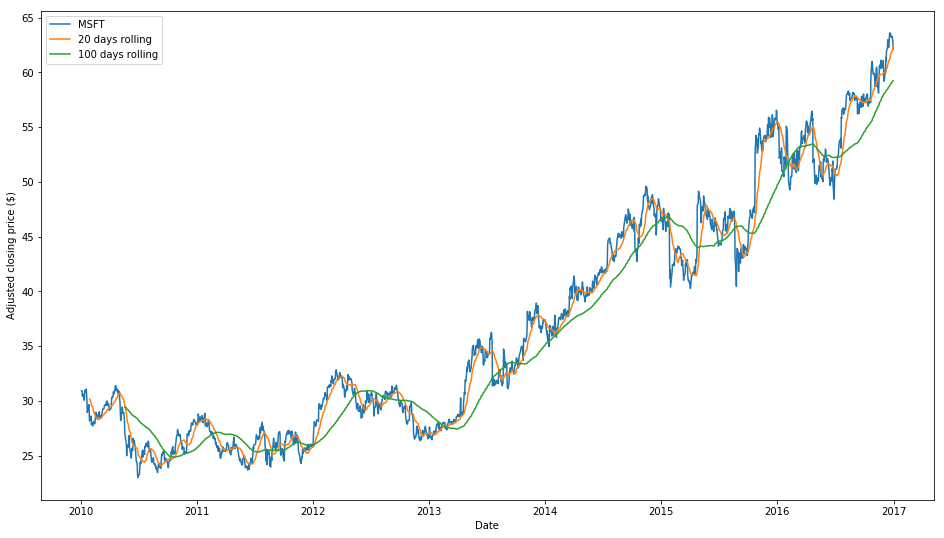

In [58]:
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(close.index, close, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()